# openalex-analysis README examples

Romain THOMAS 2023  
Stockholm Resilience Centre  

## Basic

In [1]:
from openalex_analysis.plot import WorksPlot

import pandas as pd
pd.set_option('display.width', 1000)

concept_sustainability_id = 'C66204764'

# get the works about sustainability
wplt = WorksPlot(concept_sustainability_id)

print("\nFirst entities in the dataset:")
print(wplt.entities_df[['id', 'title']].head(3), "\n")

# compute the most cited works by the dataset previously downloaded
wplt.create_element_used_count_array('reference')

print("\nMost cited work within the dataset:")
print(wplt.element_count_df.head(3))

Loading dataframe of works of the concept C66204764
Loading the list of entities from a parquet file...

First entities in the dataset:
                                 id                                              title
0  https://openalex.org/W2101946146  Asset Stock Accumulation and Sustainability of...
1  https://openalex.org/W1999167944  Planetary boundaries: Guiding human developmen...
2  https://openalex.org/W2122266551  Agricultural sustainability and intensive prod... 

Getting name of C66204764 from the OpenAlex API (cache disabled)...
Creating the works references count of works C66204764...

Most cited work within the dataset:
                                  C66204764 Sustainability
element                                                   
https://openalex.org/W2026816730                       262
https://openalex.org/W2096885696                       249
https://openalex.org/W2103847341                       203


### Concepts yearly count

Loading dataframe of works of the institution I138595864
Loading the list of entities from a parquet file...
Creating the concept count of works I138595864...
Loading dataframe of works of the institution I140494188
Loading the list of entities from a parquet file...
Creating the concept count of works I140494188...
Main entitie: I138595864 Stockholm Resilience Centre
Computing sum_all_entities...
Computing average_all_entities...
Computing proportion_used_by_main_entitie
fill with NaN values 0 of sum_all_entities to avoid them to be used when ranking (we wan't to ignore these rows as these references aren't used)
Computing sum_all_entities rank...
Computing proportion_used_by_main_entitie rank...
Computing highly used by all entities and low use by main entitie
Sorting by sum_all_entities
<class 'int'>
1
Getting name of C66204764 from the OpenAlex API (cache disabled)...
Getting name of C66204764 from the OpenAlex API (cache disabled)...


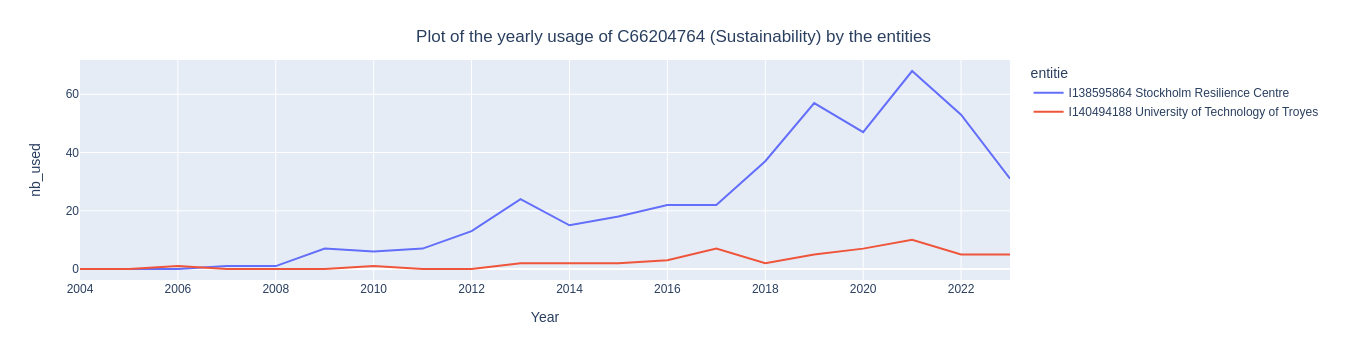

In [9]:
from openalex_analysis.plot import InstitutionsPlot, WorksPlot

concept_sustainability_id = 'C66204764'
# create the filter for the API to get only the articles about sustainability
sustainability_concept_filter = {"concepts": {"id": concept_sustainability_id}}

# set the years we want to count
count_years = list(range(2004, 2024))

institution_ids_list = ["I138595864", "I140494188"]
institution_names_list = ["Stockholm Resilience Centre", "University of Technology of Troyes"]

# create an lis
entities_ref_to_count = [None] * len(institution_ids_list)
for i in range(len(institution_ids_list)):
    entities_ref_to_count[i] = {'entitie_from_id': institution_ids_list[i],
                                'extra_filters': sustainability_concept_filter,
                                'entitie_name': institution_names_list[i]}


wplt = WorksPlot()
wplt.create_element_used_count_array('concept', entities_ref_to_count, count_years = count_years)

wplt.add_statistics_to_element_count_array(sort_by = 'sum_all_entities', min_concept_level = 2)

wplt.get_figure_time_series_element_used_by_entities().write_image("Plot_yearly_usage_sustainability_SRC_UTT.svg", width=1200)

wplt.get_figure_time_series_element_used_by_entities()